# WEkEO Hackaton

Installing dependencies for colab running

In [3]:
!pip install numpy --quiet
!pip install pandas --quiet
!pip install zarr --quiet
!pip install ipywidgets --quiet
!pip install matplotlib --quiet
!pip install zarr --quiet
!pip install scipy --quiet
!pip install scikit-image --quiet
!pip install umap-learn --quiet
!pip install opencv-python --quiet
!pip install seaborn --quiet

In [ ]:
conda install zarr
conda install -c conda-forge umap-learn
conda install -c anaconda scikit-learn
conda install -c conda-forge opencv

### Imports

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import os
import zarr
import ipywidgets as widgets
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.cluster import KMeans
from skimage import segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial
import matplotlib.patches as patches
from skimage.segmentation import morphological_chan_vese
import cv2
import imutils
from scipy.signal import savgol_filter
import datetime
from scipy.interpolate import interp1d
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Prettier plots
import seaborn as sns
sns.set(font='Palatino',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'k',
 'axes.facecolor': 'None',
 'axes.grid' : False,
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'xtick.bottom': True,
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False})

# Vectorial plot
import matplotlib_inline.backend_inline as backend_inline 
backend_inline.set_matplotlib_formats('svg')

# Move to root directory for browsing
os.chdir("..")

In [2]:
# Choose if intermediary plots must be displayed
INTERMEDIARY_PLOTS = False

# Choose if segmentation must be recomputed (it can take a long time)
COMPUTE_SEGMENTATION = True

## Connect google drive

In [ ]:
from google.colab import drive
drive.mount('pro/wekeo')

ModuleNotFoundError: No module named 'google'

In [3]:
import pickle

### Load data

In [8]:
# This is to load pickle on python 3.6
!pip3 install pickle5
import pickle5 as pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%%time
# Load all dataframes in a list
l_df = []
for file in os.listdir(r"C:\Users\Carlos\pro\wekeo\Data engineering"):
    if file.endswith(".pickle"):
        #df_temp = pd.read_pickle("Data engineering/" + file)
        with open(r"C:\Users\Carlos\pro\wekeo\Data engineering\\" + file, "rb") as fh:
            df_temp = pickle.load(fh)
        df_temp['year'] = int(file.split("_")[0])
        l_df.append(df_temp)

# Merge all dataframes
df = pd.concat(l_df, axis=0)

# Remove useless columns
df = df[['datatakesensingstart', 'beginposition', 'endposition', 'ingestiondate', 'processinglevel', 'platformname', 'size','year']]

# Sort by date
df = df.sort_values(by="beginposition")

# Delete initial list of dataframes
del l_df

df

CPU times: total: 15.6 ms
Wall time: 57 ms


,datatakesensingstart,beginposition,endposition,ingestiondate,processinglevel,platformname,size,year
411c4c16-ed88-42af-a8e2-9a1414af3a62,2016-01-05 14:37:32.029,2016-01-05 14:37:32.029,2016-01-05 14:37:32.029,2018-12-18 19:07:14.311,Level-1C,Sentinel-2,635.49 MB,2016
4baae820-6e86-4301-9c4c-590311459b04,2016-01-22 14:29:42.030,2016-01-22 14:29:42.030,2016-01-22 14:29:42.030,2018-12-14 16:58:06.033,Level-1C,Sentinel-2,378.96 MB,2016
9aa597a5-e1cc-45af-97df-655f12eeabe5,2016-02-04 14:37:22.029,2016-02-04 14:37:22.029,2016-02-04 14:37:22.029,2018-12-07 19:45:55.926,Level-1C,Sentinel-2,811.35 MB,2016
4e3062c2-018c-49a5-8037-b7b9b9eaf407,2016-02-11 14:42:12.029,2016-02-11 14:42:12.029,2016-02-11 14:42:12.029,2018-12-08 12:46:18.299,Level-1C,Sentinel-2,301.32 MB,2016
feeab6d4-6768-4da7-a0e2-d9ca3d856c20,2016-03-02 14:42:02.030,2016-03-02 14:42:02.030,2016-03-02 14:42:02.030,2018-12-06 04:22:04.990,Level-1C,Sentinel-2,288.34 MB,2016
...,...,...,...,...,...,...,...,...
4093f883-6257-4827-9b8e-64d6a13d58e1,2022-05-23 14:37:31.024,2022-05-23 14:37:31.024,2022-05-23 14:37:31.024,2022-05-23 22:24:32.282,Level-1C,Sentinel-2,645.87 MB,2022
884fff44-99f2-4bd5-a571-6fe53ccb3d15,2022-05-28 14:37:29.024,2022-05-28 14:37:29.024,2022-05-28 14:37:29.024,2022-05-28 19:54:16.107,Level-1C,Sentinel-2,633.39 MB,2022
b31187b3-349f-4988-96ed-305692e738a8,2022-06-02 14:37:41.024,2022-06-02 14:37:41.024,2022-06-02 14:37:41.024,2022-06-02 23:14:05.200,Level-1C,Sentinel-2,799.76 MB,2022
9cb65394-097c-40c0-bee0-1eb2849acb67,2022-06-07 14:37:29.024,2022-06-07 14:37:29.024,2022-06-07 14:37:29.024,2022-06-07 19:38:38.627,Level-1C,Sentinel-2,739.14 MB,2022


In [14]:
## Testing parallel loading of ZARR
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

def paral(func, lista, N, threads=True, processes=False):
    if processes:
        with ProcessPoolExecutor(max_workers=N) as executor:
            results = executor.map(func, lista)
        return list(results)
    elif threads:
        with ThreadPoolExecutor(max_workers=N) as executor:
            results = executor.map(func, lista)
        return list(results)

def loadindex(index):
    try:
        return img[index][:]
    except Exception as e:
        print(e)

In [6]:
%%time
# Load all arrays in memory
l_arrays = []
for year in df.year:
    with zarr.open("Data engineering/" + str(year) + '.zarr', mode = 'r') as img:
            index = df[ df.year == year].index.tolist()
            #l_arrays.append(img[index][:])
            out = paral(loadindex, index, 10)
            try:
                out = [i for i in out if i] #Drop None
                l_arrays.append(out)
            except:
                pass
            

# Convert to numpy array
array_data = np.concatenate(l_arrays)

# Free memory
del l_arrays

print(array_data.size/1024**2)
print(array_data.shape)

PathNotFoundError: nothing found at path ''

In [5]:
%%time
# Load all arrays in memory
l_arrays = []
for index, year in zip(df.index, df.year):
    with zarr.open(r"C:\Users\Carlos\pro\wekeo\Data engineering\\" + str(year) + '.zarr', mode = 'r') as img:
        try:
            l_arrays.append(img[index][:])
        except Exception as e:
            print(year, e)

# Convert to numpy array
array_data = np.array(l_arrays)

# Free memory
del l_arrays

print(array_data.size/1024**2)
print(array_data.shape)

5081.348419189453
(396, 13, 900, 1150)
CPU times: total: 22.8 s
Wall time: 27.9 s


In [6]:
# Remove 9th dimension as it's unusable
array_data = np.delete(array_data, 9, axis = 1)

In [7]:
# Rearange data
array_data = np.swapaxes(array_data, 1, 2)
array_data = np.swapaxes(array_data, 2, 3)
print(array_data.shape)

(396, 900, 1150, 12)


In [8]:
# Crop images as they're too large for ML on a laptop
array_data = array_data[:,150:551,150:751,:]

In [9]:
# Normalize by the 90th percentile for RGB channels
percentile = np.percentile(array_data[:,:,:,(1,2,3)], 90)
for ax in [1,2,3]:
    array_data[:,:,:,ax] = (array_data[:,:,:,ax].astype(np.float64) / percentile * 255).astype(np.int16)
    # Cap values above 255 
    array_data[:,:,:,ax] = np.clip(array_data[:,:,:,ax], 0, 255)


### Try to visualize the data

In [10]:
def visualize_data(array_data, array_segments = None, array_times = None, cmap='crest'):
    # Widget slider to browse the data
    index = widgets.IntSlider(
        value=5, min=0, max=array_data.shape[0] - 1, step=1, description="Index"
    )

    # Other widget slider to browse the channels
    channel = widgets.IntSlider(
        value=5, min=0, max=array_data.shape[3] - 1, step=1, description="Channel"
    )

    # Checkbox to display RGB (override the channel)
    display_RGB = widgets.Checkbox(description="Display RGB", value=False)

    ui = widgets.HBox([index, channel, display_RGB])

    # Widget interaction function
    def anim(index_value, channel_value, display_RGB_value):
        fig = plt.figure(figsize=(10,8))
        if display_RGB_value:
            plt.imshow( array_data[index_value, :, :, (3,2,1)].swapaxes(0,1).swapaxes(1, 2))
        else:
            plt.imshow(array_data[index_value, :, :, channel_value], cmap = cmap)
        if array_segments is not None:
            if np.sum(array_segments[index_value])>0:
                plt.contour(array_segments[index_value], [0.5], colors='r')
        if array_times is not None:
            plt.title('Acquisition time: ' + str(array_times[index_value]))
        else:
            plt.title('Acquisition time: ' + str(df['beginposition'][index_value]))
        plt.axis('off')
        return

    # Link widget and function
    out = widgets.interactive_output(anim, {"index_value": index, 'channel_value': channel, 'display_RGB_value': display_RGB})

    # Display result
    return ui, out
    
ui, out = visualize_data(array_data)
display(ui, out)


Output()

### Discard most clouds and black images

findfont: Font family ['Palatino'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Palatino'] not found. Falling back to DejaVu Sans.


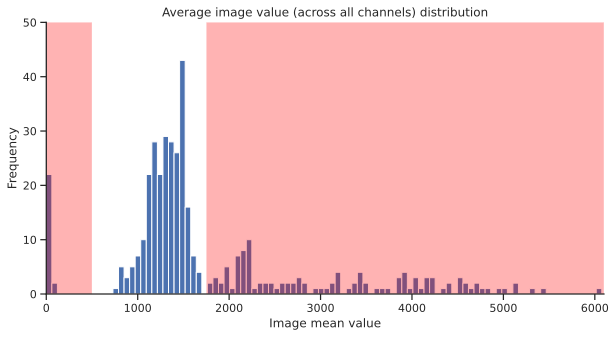

In [10]:
# Compute mean value of the image and check outliers
l_mean = [np.mean(x.flatten()) for x in array_data[:, :, :, :]]
lb, hb = 500, 1750

# Create figure and axes
fig, ax = plt.subplots(1, figsize = (10,5))
fig.patch.set_facecolor('white')
plt.hist(l_mean, bins=100)
plt.ylim(0, 50)
plt.xlim(0, 6100)
plt.xlabel("Image mean value")
plt.ylabel("Frequency")

# Create two rectangle patches to show discarded data and add them to the plot
rect = patches.Rectangle((0, 0), lb, 50, alpha = 0.3, facecolor="red")
rect2 = patches.Rectangle((hb, 0), 6100-hb, 50, alpha = 0.3, facecolor="red")
ax.add_patch(rect)
ax.add_patch(rect2)
plt.title('Average image value (across all channels) distribution')
plt.show()

In [12]:
# Discard images out of selected threshold
l_idx_to_keep = [idx for idx, m in enumerate(l_mean) if m > lb and m < hb]
array_data_cropped = array_data[l_idx_to_keep, :, :, :]
array_times = [df['beginposition'][index_value] for index_value in l_idx_to_keep]

if INTERMEDIARY_PLOTS:
    # Display result after this filtering
    ui, out = visualize_data(array_data_cropped, array_times = array_times)
    display(ui, out)

### Segment with active contour model

In [13]:
%%time
# Calculate NDWI
# https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/ndwi/

def calc_ndwi(image):
    up = np.float16(image[:,:,2] -  image[:,:,7])
    down = np.float16(image[:,:,2] + image[:,:,7])
    NDWI = np.divide(up, down, out=np.zeros_like(up), where=down!=0, dtype=np.float16)
    return NDWI

ndwi_array = np.array(paral(calc_ndwi, array_data_cropped, 10))[:,:,:,np.newaxis]

NameError: name 'paral' is not defined

In [15]:
%%time
def apply_segmentation(image):
    image_normalized = image/np.max(image)
    seg = morphological_chan_vese(image_normalized , num_iter= 200, init_level_set='disk', smoothing=2, lambda1 = 10., lambda2 = 1.)
    return seg
    
if COMPUTE_SEGMENTATION:
    # Segment all images in the dataset on channel 9 (# ! Takes ~1h to run) (B03 - B08) / (B03 + B08)
    l_segmented_images = paral(apply_segmentation, array_data_cropped[:,:,:,9], 10) #array_data_cropped[:,:,:,9] #np.squeeze(ndwi_array)+1
    array_segmented_images = np.array(l_segmented_images)
    del l_segmented_images

    # Store result as it's pretty heavy to compute
    with open(r"C:\Users\Carlos\pro\wekeo\Data engineering\\segmentation.npy", 'wb') as f:
        np.save(f, array_segmented_images)
else:
    array_segmented_images = np.load(r"C:\Users\Carlos\pro\wekeo\Data engineering\\segmentation.npy")

if INTERMEDIARY_PLOTS:
    # Display segmentation result
    ui, out = visualize_data(array_data_cropped,  array_segments = array_segmented_images, array_times = array_times)
    display(ui, out)

CPU times: total: 1h 16min 52s
Wall time: 10min 31s


In [16]:
ui, out = visualize_data(array_data_cropped,  array_segments = array_segmented_images, array_times = array_times)
display(ui, out)

Output()

In [18]:
# Filter out segments that are 80% smaller than the main segment
for index, segment in enumerate(array_segmented_images):
    try:
        cnts = cv2.findContours(segment.astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
        rect_areas = []
        for c in cnts:
            (x, y, w, h) = cv2.boundingRect(c)
            rect_areas.append(w * h)
        max_area = np.max(rect_areas)
        for c in cnts:
            (x, y, w, h) = cv2.boundingRect(c)
            cnt_area = w * h
            if cnt_area < 0.2 * max_area:
                segment[y:y + h, x:x + w] = 0
        array_segmented_images[index] = segment
    except Exception as e:
        print(e)

if INTERMEDIARY_PLOTS:
    # Display result after filtering for small segments
    ui, out = visualize_data(array_data_cropped,  array_segments = array_segmented_images, array_times = array_times)
    display(ui, out)

zero-size array to reduction operation maximum which has no identity
zero-size array to reduction operation maximum which has no identity
zero-size array to reduction operation maximum which has no identity
zero-size array to reduction operation maximum which has no identity
zero-size array to reduction operation maximum which has no identity


In [19]:
# Filter out segments out segments that are outside of the largest segment when the lake is the 
# fullest (among the first images, as it becomes empty afterwards)
biggest_segment_index = np.argmax([np.sum(x) for x in array_segmented_images[:20]])
biggest_segment = array_segmented_images[biggest_segment_index]
for index, segment in enumerate(array_segmented_images):
    segment_diff = biggest_segment - segment
    segment[segment_diff < 0] = 0
    array_segmented_images[index] = segment
    
if INTERMEDIARY_PLOTS:
    # Display result
    ui, out = visualize_data(array_data_cropped,  array_segments = array_segmented_images, array_times = array_times)
    display(ui, out)


### More filtering based on water content

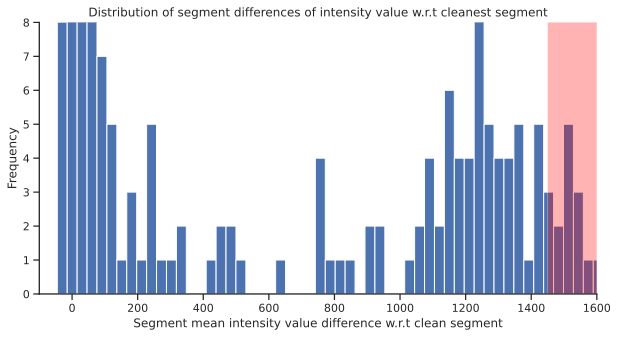

In [20]:
# Display distribution of intensity difference with 'pure' lake
fig, ax = plt.subplots(1, figsize = (10,5))
l_diff_mean_segments = [np.mean(array_data_cropped[index,:,:,9][segment==1])-np.mean(array_data_cropped[biggest_segment_index,:,:,9][biggest_segment==1]) if np.sum(segment)>0 else np.nan for index, segment in enumerate(array_segmented_images)]
fig.patch.set_facecolor('white')
plt.hist(l_diff_mean_segments, bins=100)
plt.ylim(0, 8)
plt.xlim(-100, 1600)
plt.xlabel("Segment mean intensity value difference w.r.t clean segment")
plt.ylabel("Frequency")
tresh = 1450

# Create one rectangle patch and add it to the plot
rect = patches.Rectangle((tresh, 0), 1600-tresh, 8, alpha = 0.3, facecolor="red")
ax.add_patch(rect)
plt.title("Distribution of segment differences of intensity value w.r.t cleanest segment")
plt.show()

In [21]:
# Filter out segments that have an intensity which is significantly different from when the lake is the purest
array_segmented_images = np.array([segment if (l_diff_mean_segments[index]< tresh and not np.isnan(l_diff_mean_segments[index])) else np.zeros_like(segment) for index, segment in enumerate(array_segmented_images)])

if INTERMEDIARY_PLOTS:
    # Display result
    ui, out = visualize_data(array_data_cropped,  array_segments = array_segmented_images, array_times = array_times)
    display(ui, out)


In [22]:
len(array_times)

256

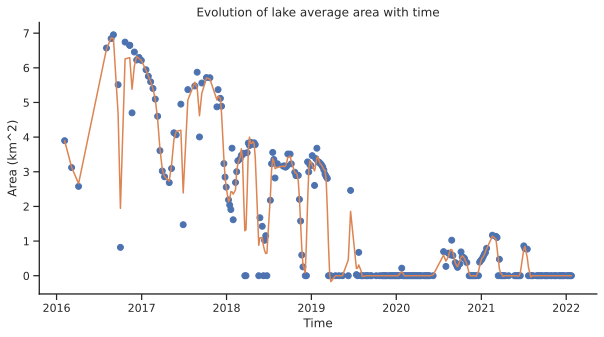

In [23]:
# Display area and detect images with abrupt change in segment with respect to the the previous and the next one 
array_area = np.array([np.sum(segment) for index, segment in enumerate(array_segmented_images)])

# Get time in proper units
array_times_int = np.array( [(x - datetime.datetime(1970, 1, 1)).total_seconds() for x in array_times])
array_times_int = (array_times_int - array_times_int[0]) / 10**6

# Interpolate the signal with a regular sampling for smoothing afterwards
f = interp1d(array_times_int, array_area, kind='linear')
xnew = np.linspace(0, array_times_int[-1], num=500, endpoint=True)
y_new = f(xnew)

# Smooth the signal with a Savgol filter
yhat = savgol_filter(y_new, 7, 3) # window size 7, polynomial order 3

# Reinterpolate 
f = interp1d(xnew, yhat, kind='linear')
y_hat_proper_sampling = f(array_times_int)


# Plot the smoothed signal
plt.figure(figsize=(10,5))
plt.plot(array_times, array_area * 100/1000000, 'o', array_times, y_hat_proper_sampling* 100/1000000, '-')
plt.xlabel('Time')
plt.ylabel('Area (km^2)')
plt.title('Evolution of lake average area with time')
plt.show()

findfont: Font family ['Palatino'] not found. Falling back to DejaVu Sans.


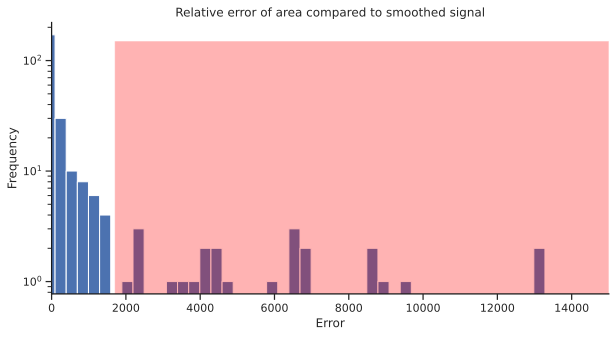

In [24]:
# Plot histogram of relative error compared to smoothed signal 
fig, ax = plt.subplots(1, figsize = (10,5))
l_relative_error = (array_area-y_hat_proper_sampling)**2/np.array(y_hat_proper_sampling+1)
plt.hist(l_relative_error , bins=50)
plt.xlim(0, 15000)
plt.xlabel("Error")
plt.ylabel("Frequency")
tresh = 1700
# Create one rectangle patch and add it to the plot
rect = patches.Rectangle((tresh, 0), 15000-tresh, 150, alpha = 0.3, facecolor="red")
ax.add_patch(rect)

ax.set_yscale('log')
#plt.ylim(0,150)
plt.title('Relative error of area compared to smoothed signal')

plt.show()

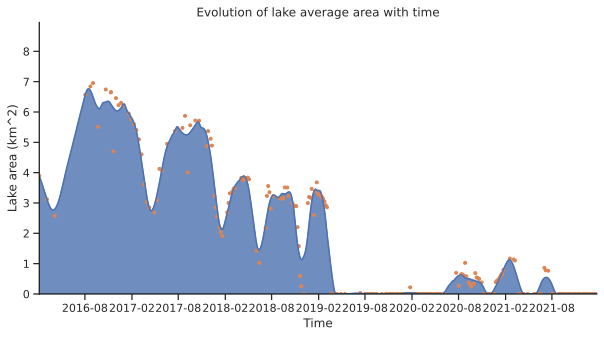

In [25]:
# Discard the points that are too far from the smooth signals (outliers)
l_idx_to_keep = [index for index, error in enumerate(l_relative_error) if error < tresh]
array_area_filtered = array_area[l_idx_to_keep]*100/1000000 # To have km^2 for now
array_data_filtered = array_data_cropped[l_idx_to_keep]
array_times_filtered = np.array(array_times)[l_idx_to_keep]
array_times_int_filtered = np.array(array_times_int)[l_idx_to_keep]
array_segmented_images_filtered = array_segmented_images[l_idx_to_keep]

# Make a last smooth version 
f = interp1d(array_times_int_filtered, array_area_filtered, kind='slinear')
xnew = np.linspace(0, array_times_int_filtered[-1], num=500, endpoint=True)
yhat = [x if x>=0 else 0 for x  in savgol_filter(f(xnew), 21, 3)]
x_times = [datetime.datetime.fromtimestamp(x) for x in xnew * 10**6 + array_times_filtered[0].timestamp() ]


# Plot the final curve
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(array_times_filtered , array_area_filtered, '.', c = 'C1')
plt.plot( x_times, yhat, '-', c = 'C0')
ax.fill_between(x_times, yhat, 0, color='C0', alpha=.8)
plt.xlabel('Time')
plt.ylabel('Lake area (km^2)')
plt.xlim(array_times_filtered[0], array_times_filtered[-1])
plt.ylim([0, np.max(array_area_filtered+2)])
# Define the date format
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.title('Evolution of lake average area with time')
plt.show()

In [26]:
# Display final set of acquisitions
ui, out = visualize_data(array_data_filtered,  array_segments = array_segmented_images_filtered, array_times = array_times_filtered)
display(ui, out)

Output()

### Study the algae content of the segmented regions

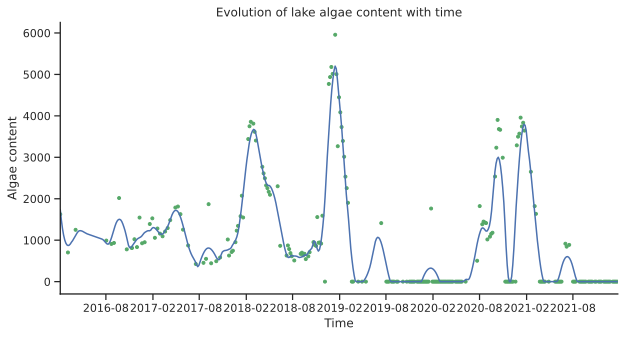

In [27]:
# Compute algae content for each acquisition
l_mean_algae = [np.mean(array_data_filtered[index,:,:,6][segment==1]) if np.sum(segment)>0 else 0 for index, segment in enumerate(array_segmented_images_filtered)]

# Smooth the signal with a Savgol filter
f = interp1d(array_times_int_filtered, l_mean_algae, kind='slinear')
xnew = np.linspace(0, array_times_int_filtered[-1], num=500, endpoint=True)
yhat_algae = [x if x>=0 else 0 for x  in savgol_filter(f(xnew), 21, 3)]
x_times = [datetime.datetime.fromtimestamp(x) for x in xnew * 10**6 + array_times_filtered[0].timestamp() ]

# Plot the final curve
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(array_times_filtered , l_mean_algae, '.', c = 'C2')
plt.plot( x_times, yhat_algae, '-', c = 'C0')

plt.xlabel('Time')
plt.ylabel('Algae content')
plt.xlim(array_times_filtered[0], array_times_filtered[-1])
#plt.ylim([0, np.max(array_area_filtered+2000)])
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.title('Evolution of lake algae content with time')
plt.show()

findfont: Font family ['Palatino'] not found. Falling back to DejaVu Sans.


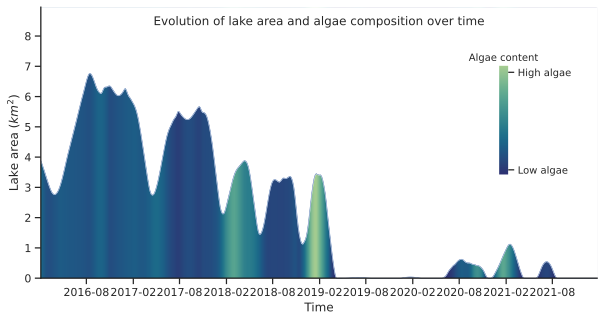

In [28]:
# Scalre for main axes
ylims = [0, np.max(array_area_filtered+2)]
xlims = mdates.date2num([array_times_filtered[0], array_times_filtered[-1]])

# Scale for the colorbar
min_algae = np.min(yhat_algae)
max_algae = np.max(yhat_algae)
scale_algae = max_algae - min_algae

# Draw the image over the whole plot area
fig, ax = plt.subplots(figsize=(10,5))
im = plt.imshow(np.array([yhat_algae]), cmap='crest_r', origin='lower', extent=[xlims[0], xlims[1], ylims[0],  ylims[1]],aspect='auto')

# Erase above the data by filling with white
plt.fill_between(x_times, yhat, ylims[1], color='w')

# Make the line plot over the top
plt.plot(x_times, yhat, 'C0', linewidth=0.5)


# Set limits
ax.set_xlim(xlims)
ax.set_ylim(ylims)

# Labels
plt.xlabel('Time')
plt.ylabel('Lake area ' + r'($km^2$)')
ax.set_title('Evolution of lake area and algae composition over time', y=1.0, pad=-18)

# More customization
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Define the date format
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

#add color bar
cbaxes = inset_axes(ax, width="2%", height="50%", bbox_to_anchor = [0,0,0.85,0.8], bbox_transform=ax.transAxes, loc=1) 
t = fig.colorbar(im, cax=cbaxes, orientation='vertical', ticks=[min_algae + scale_algae * 0.05, max_algae - scale_algae * 0.05])
cbaxes.set_title('Algae content', size=10)
cbaxes.set_yticklabels(['Low algae', 'High algae'], size = 10) 
t.outline.set_visible(False)

plt.show()

# Anything below is work in progress or will be dropped

### Segment with random forest

In [29]:
array_train = array_data_cropped[51,:,:,10]
array_train=array_train/np.max(array_train)

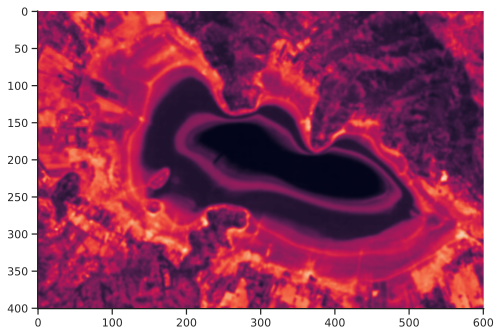

In [30]:
fig = plt.figure(figsize=(8,8))
plt.imshow( array_train[ :,:])
plt.show()


In [31]:
training_labels = np.zeros(array_train.shape[:2], dtype=np.uint8)
training_labels[200:240, 250:400] = 1
training_labels[:, 0:100] = 2
training_labels[0:50, :] = 2
training_labels[350:, :] = 2
training_labels[:, 550:] = 2



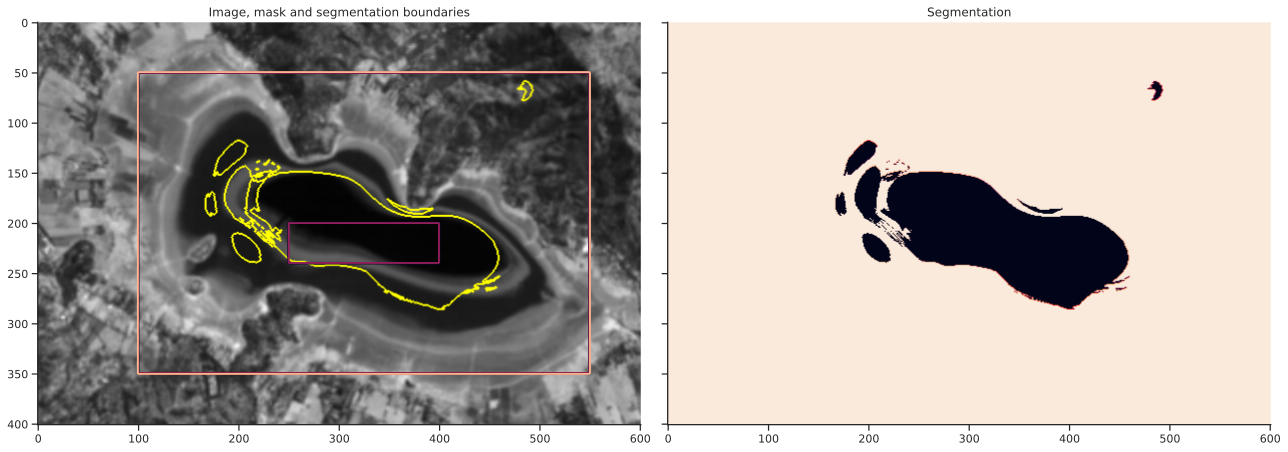

In [32]:
sigma_min = 5
sigma_max = 18
features_func = partial(feature.multiscale_basic_features,
                        intensity=True, edges=True, texture=True,
                        sigma_min=sigma_min, sigma_max=sigma_max,
                        channel_axis=None)

features = features_func(array_train)
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1,
                             max_depth=10, max_samples=0.05)
clf = future.fit_segmenter(training_labels, features, clf)
result_train = future.predict_segmenter(features, clf)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 8))
ax[0].imshow(segmentation.mark_boundaries(array_train , result_train, mode='thick'))
ax[0].contour(training_labels)
ax[0].set_title('Image, mask and segmentation boundaries')
ax[1].imshow(result_train)
ax[1].set_title('Segmentation')
fig.tight_layout()

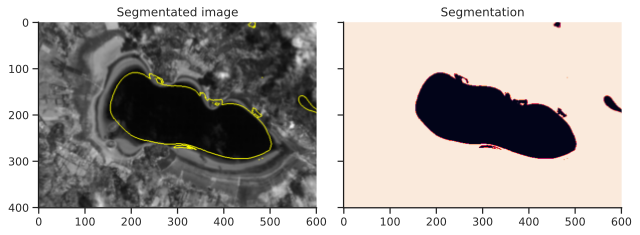

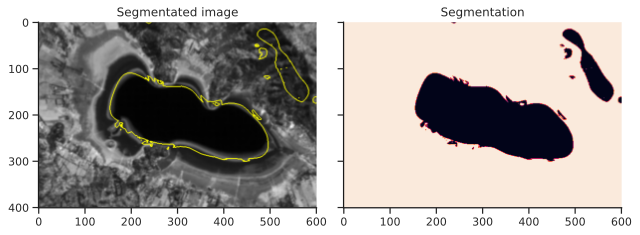

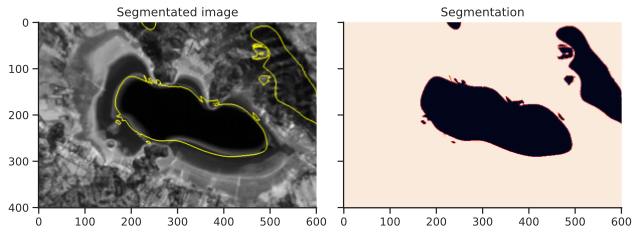

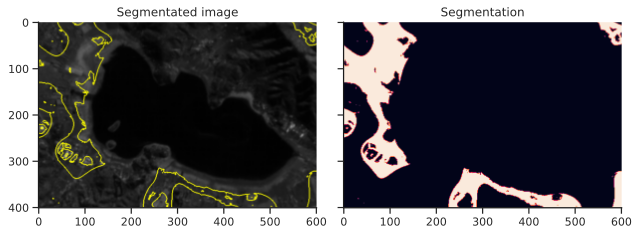

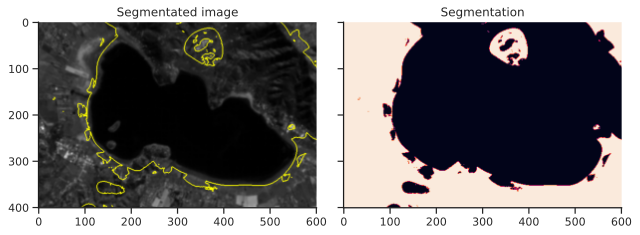

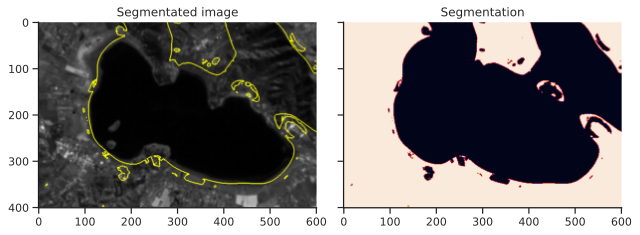

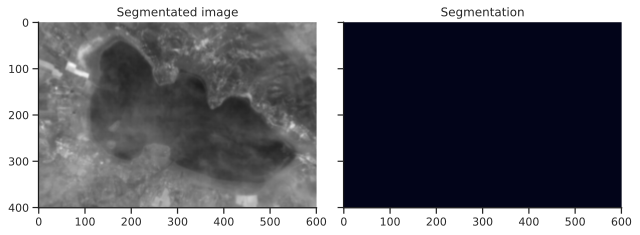

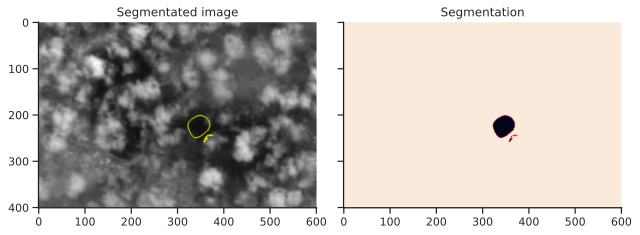

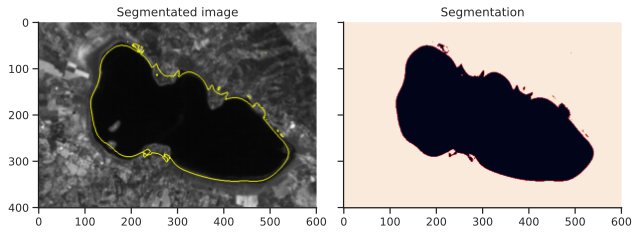

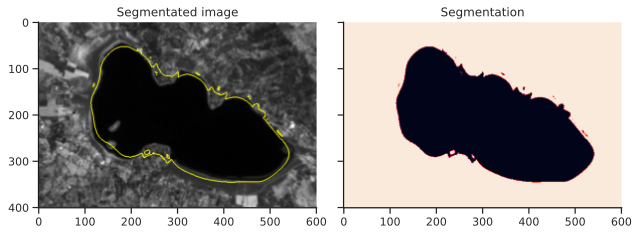

In [33]:
for array_test in array_data_cropped[:10,:,:,10]:
    array_test=array_test/np.max(array_test)
    features = features_func(array_test)
    result_test = future.predict_segmenter(features, clf)

    fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))
    ax[0].imshow(segmentation.mark_boundaries(array_test , result_test, mode='thick'))
    ax[0].set_title('Segmentated image')
    ax[1].imshow(result_test)
    ax[1].set_title('Segmentation')
    fig.tight_layout()
    plt.show()

### Cluster pixels in a low-dimensional space

In [34]:
# Subsample x10 as the data is too heavy for pixel clustering
subsample_param = 10
array_data_sub = array_data[:,::subsample_param,::subsample_param,:]

In [35]:
array_data_sub.shape

(396, 41, 61, 12)

In [36]:
# Add spatial coordinates
array_data_sub = np.concatenate((array_data_sub, np.zeros((array_data_sub.shape[0], array_data_sub.shape[1], array_data_sub.shape[2], 2))), axis = 3)
X, Y = np.meshgrid(np.arange(array_data_sub.shape[1]), np.arange(array_data_sub.shape[2]))
array_data_sub[:,:,:,-2] = X.T + 1
array_data_sub[:,:,:,-1] = Y.T + 1

In [37]:
# Select a give timepoint 
t = 100
array_to_cluster = np.reshape(array_data_sub[t,:,:,:], (array_data_sub.shape[1]*array_data_sub.shape[2], array_data_sub.shape[3]))

In [38]:
print(array_to_cluster.shape)

(2501, 14)


In [39]:
# Standardize
array_to_cluster = (array_to_cluster.astype(np.float64) - array_to_cluster.mean(axis=0))/array_to_cluster.std(axis=0)

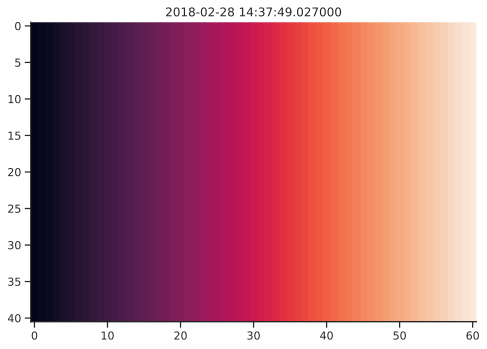

In [40]:
fig = plt.figure(figsize=(8,8))
plt.imshow( array_to_cluster.reshape(array_data_sub.shape[1], array_data_sub.shape[2], array_data_sub.shape[3])[:,:,13])
plt.title(df['beginposition'][100])
plt.show()

In [41]:
# Sample
#array_to_cluster_train = array_to_cluster[np.random.choice(array_to_cluster.shape[0], int(array_to_cluster.shape[0]*0.2), replace=False), :]
#array_to_cluster_test = array_to_cluster[np.random.choice(array_to_cluster.shape[0], int(array_to_cluster.shape[0]*0.8), replace=False), :]

In [42]:
# Compute a UMAP projection on a small subset of the data
umap_2d = UMAP(n_components=3, init='random', random_state=0)
proj_2d = umap_2d.fit(array_to_cluster)
kmeans = KMeans(n_clusters=5, random_state=0).fit(proj_2d.embedding_)

In [43]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.3, min_samples=20).fit(proj_2d.embedding_)

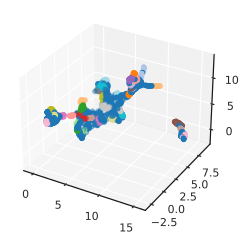

In [44]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Plot the result
ax.scatter(
    proj_2d.embedding_[:,0], proj_2d.embedding_[:,1], proj_2d.embedding_[:,2], cmap='tab20',
    c=clustering.labels_ ,)
plt.show()

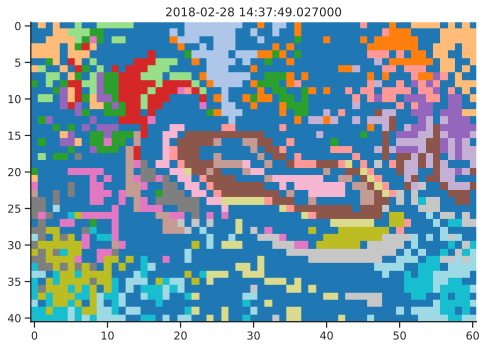

In [45]:
# Map back to initial image
segments = np.reshape(clustering.labels_, (array_data_sub.shape[1], array_data_sub.shape[2]))
fig = plt.figure(figsize=(8,8))
plt.imshow( segments, cmap='tab20',)
plt.title(df['beginposition'][100])
plt.show()

In [46]:
# Compute the projection of all pixels now
test_embedding = proj_2d.transform(array_to_cluster_test)

NameError: name 'array_to_cluster_test' is not defined

In [47]:
# Plot the result
plt.scatter(
    test_embedding[:,0], test_embedding[:,1], #c=kmeans.labels_, cmap='tab20'
    #color=[str(x) for x in kmeans.labels_],
    #text = [str(i) + '\n\n' + x for i, x in enumerate(l_lipids)], size_max=6
)

plt.show()

NameError: name 'test_embedding' is not defined

In [ ]:
# Map back pixels to image
